In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df=pd.read_csv("placement (3).csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


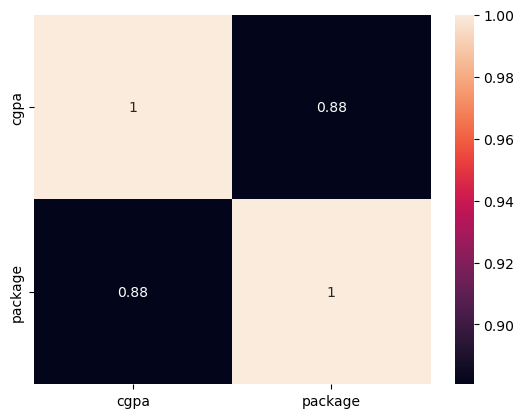

In [5]:
sns.heatmap(df.corr(),annot=True);

In [178]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

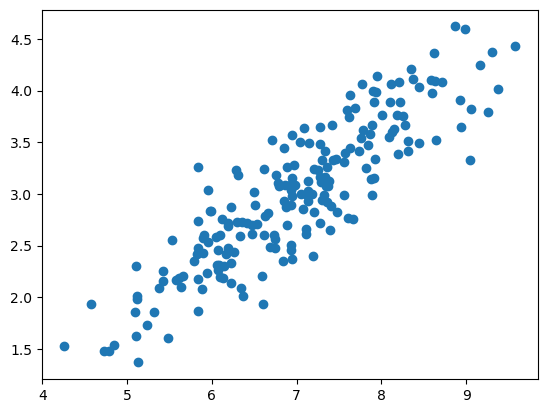

In [180]:
plt.scatter(df['cgpa'],df['package']);

In [181]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


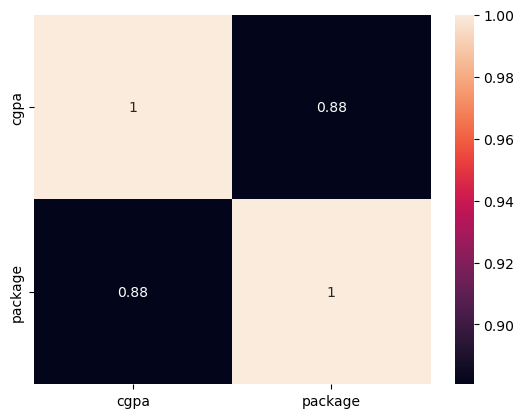

In [182]:
sns.heatmap(df.corr(),annot=True);

In [183]:
x=df[['cgpa']]
y=df['package']

In [186]:
from sklearn.model_selection import train_test_split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [191]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)



(160, 1) (160,)
(40, 1) (40,)


In [193]:
from sklearn.linear_model import LinearRegression

In [196]:
lr=LinearRegression()
lr.fit(x_train,y_train)# training

LinearRegression()

In [197]:
m=lr.coef_
m

array([0.55795197])

In [200]:
c=lr.intercept_
c

-0.8961119222429166

In [201]:
x_train.head(1)

,cgpa
137,7.14


In [204]:
y_train[0]

3.26

In [205]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [208]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [209]:
r2_score(y_train,y_pred_train)

0.7733110961245032

In [215]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [217]:
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score

In [219]:
from sklearn.metrics import r2_score

In [221]:
print(' mse of testing error',mse(y_test,y_pred_test))
print(' mse of training error',mse(y_train,y_pred_train))

 mse of testing error 0.12129235313495523
 mse of training error 0.10345460923452961


In [223]:
print('rmse of testing error',mse(y_test,y_pred_test)**0.5)
print('rmse of training error',np.sqrt(mse(y_train,y_pred_train)))

rmse of testing error 0.3482705171773161
rmse of training error 0.3216436059282535


In [225]:
print('rmse of testing error',mae(y_test,y_pred_test))
print('rmse of training error',mae(y_train,y_pred_train))

rmse of testing error 0.2884710931878174
rmse of training error 0.2529676082975413


In [227]:
print(' mse of testing error',r2_score(y_test,y_pred_test))
print(' mse of training error',r2_score(y_train,y_pred_train))

 mse of testing error 0.7807301475103842
 mse of training error 0.7733110961245032


In [228]:
df1=pd.DataFrame()
df1

""


In [230]:
df1['package']=y_test

In [233]:
df1['pred_test']=y_pred_test

In [235]:
df1

,package,pred_test
112,4.10,3.891116
29,3.49,3.093245
182,2.08,2.384646
199,2.33,2.574349
193,1.94,1.653729
85,1.48,1.776478
10,1.86,2.072193
54,3.09,2.931439
115,4.21,3.762787
35,2.87,2.937018


In [237]:
y_avg=df1['package'].mean()

In [239]:
df1['y-y_avg']=df1['package']-y_avg

In [241]:
df1['y-y_avg_sq']=df1['y-y_avg']**2

In [249]:
tss=df1['y-y_avg_sq'].sum()
tss

22.12659

In [257]:
df1['rs']=(df1['package']-df1['pred_test'])**2

In [259]:
df1

,package,pred_test,y-y_avg,y-y_avg_sq,rs
112,4.10,3.891116,1.1355,1.28936,0.043633
29,3.49,3.093245,0.5255,0.27615,0.157415
182,2.08,2.384646,-0.8845,0.78234,0.092809
199,2.33,2.574349,-0.6345,0.40259,0.059707
193,1.94,1.653729,-1.0245,1.04960,0.081951
85,1.48,1.776478,-1.4845,2.20374,0.087899
10,1.86,2.072193,-1.1045,1.21992,0.045026
54,3.09,2.931439,0.1255,0.01575,0.025142
115,4.21,3.762787,1.2455,1.55127,0.199999
35,2.87,2.937018,-0.0945,0.00893,0.004491


In [265]:
rss=df1['rs'].sum()
rss

4.851694125398209

In [269]:
R2_score=1-(rss/tss)
R2_score

0.7807301475103842

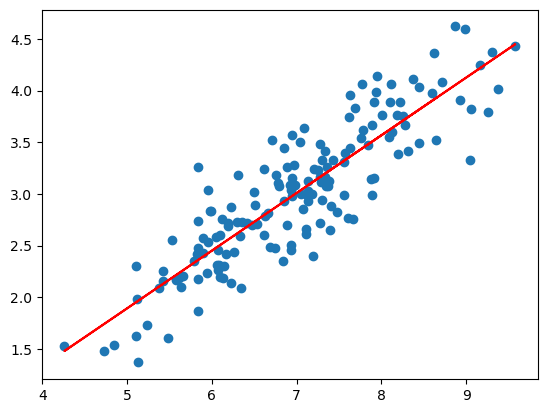

In [277]:
plt.scatter(x_train['cgpa'],y_train)
plt.plot(x_train['cgpa'],y_pred_train,color='red');